# Executing APEx-Compliant Services

In this notebook, we demonstrate how to execute an APEx-compliant service from the [**APEx Algorithm Services Catalogue**](https://algorithm-catalogue.apex.esa.int/).

In [1]:
%pip install openeo

In [2]:
import openeo
import requests
import json

In [3]:
import rasterio
import matplotlib.pyplot as plt

def visualise_tif(path: str):
    with rasterio.open(path) as src:
        data = src.read(1)  # Read the first band
        plt.figure(figsize=(10, 10))
        plt.imshow(data, cmap='Greys_r')
        plt.colorbar()
        plt.show()

Matplotlib is building the font cache; this may take a moment.


## 1. Executing a service from the APEx Algorithm Services Catalogue

At this first step is to select a service from the [APEx Algorithm Services Catalogue](https://algorithm-catalogue.apex.esa.int/). In this case we will be using the [Variability Map](https://algorithm-catalogue.apex.esa.int/apps/variabilitymap#variability-map) service. We can retrieve the relevant information from the execution information on the service deatils.

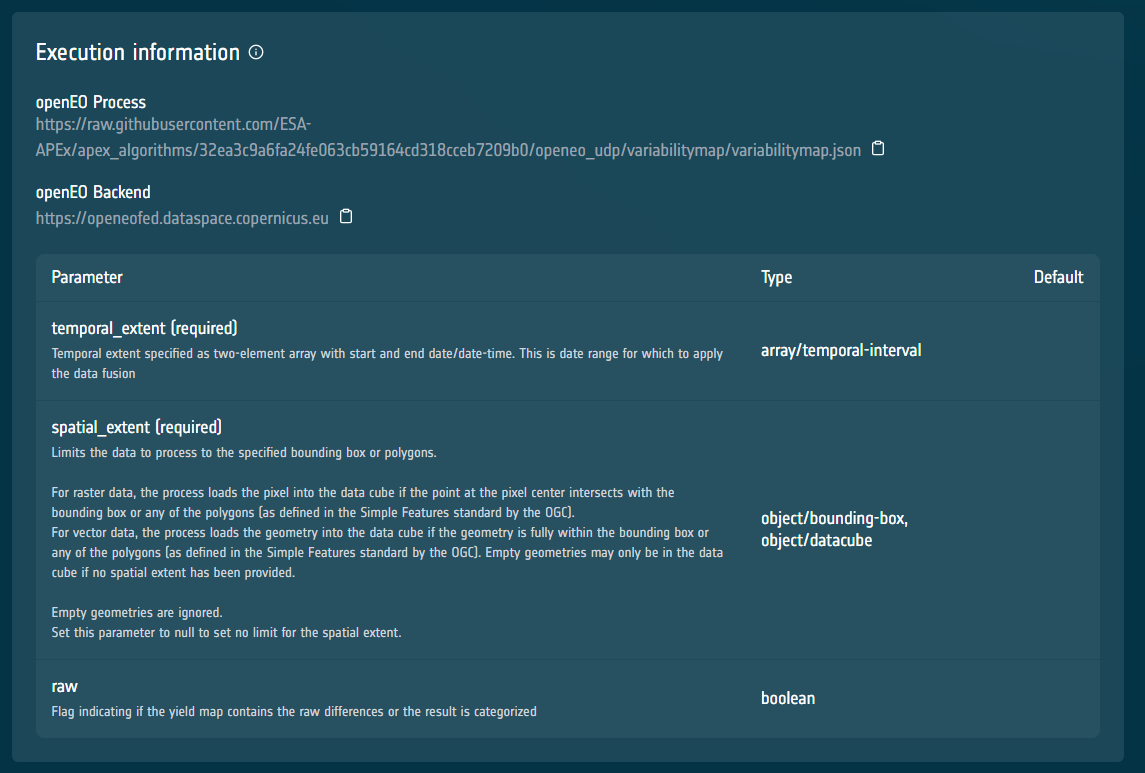


In [9]:
openeo_backend = "https://openeo.cloud"
openeo_process = "https://raw.githubusercontent.com/ESA-APEx/apex_algorithms/32ea3c9a6fa24fe063cb59164cd318cceb7209b0/openeo_udp/variabilitymap/variabilitymap.json"


spatial_extent = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              5.170043941798298,
              51.25050990858725
            ],
            [
              5.171035037521989,
              51.24865722468999
            ],
            [
              5.178521828188366,
              51.24674578027137
            ],
            [
              5.179084341977159,
              51.24984764553983
            ],
            [
              5.170043941798298,
              51.25050990858725
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

date_value = "2025-05-01"

In [10]:
connection = openeo.connect(openeo_backend).authenticate_oidc()

<class 'requests.exceptions.ConnectionError'>: ('Connection aborted.', HTTPException('Failed to fetch'))

In [ ]:
service = connection.datacube_from_process(
    process_id="variabilitymap",
    namespace=openeo_process,
    spatial_extent=spatial_extent,
    temporal_extent=[date_value, date_value]
)
service

In [ ]:
job = service.execute_batch("result.tiff",title="APEx - Demo - Variability Map")

In [ ]:
job = connection.job("<PASTE JOB ID HERE>")
job

In [ ]:
visualise_tif("result.tiff")